# Explore here

In [223]:
#K means 
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [224]:
# Load the dataset 
url = "https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv"
df = pd.read_csv(url)
df.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [225]:
# Count zeros in the entire dataset 
zero_count = (df == 0).sum().sum()
print(f"Number of zeros: {zero_count}")

Number of zeros: 0


In [226]:
# Split the data into x and y 
X = df.drop(columns=['MedHouseVal'])
y = df['MedHouseVal']

In [227]:
X.shape

(20640, 8)

In [228]:
y.shape

(20640,)

In [229]:
# Splitting the data in the training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)


In [230]:
# Ensure the test set has the same columns as the training set
# Remove any columns from the test set that are not present in the training set
X_test = X_test[X_train.columns]

In [231]:
# Preprocess the test set
# Handle missing values in the test set (using the same method as for the training set)
X_test.fillna(df.mean(), inplace=True)  # Use training data's mean to fill missing values

In [232]:
# print our the shape of the training and testing sets 
print("Training set shape: ",X_train.shape, y_train.shape)
print("Testing set shape: ",X_test.shape, y_test.shape)

Training set shape:  (16512, 8) (16512,)
Testing set shape:  (4128, 8) (4128,)


In [233]:
# Normalize the features
scaler = StandardScaler()
numeric_features = df.select_dtypes(include=[np.number])  # Select only numeric columns
scaled_features = scaler.fit_transform(numeric_features)
X_test= scaler.fit_transform(numeric_features)

In [234]:
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=6, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features) 

In [235]:
# Visualize the Clusters
# Use PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
df['pca1'] = pca_result[:, 0]
df['pca2'] = pca_result[:, 1]   

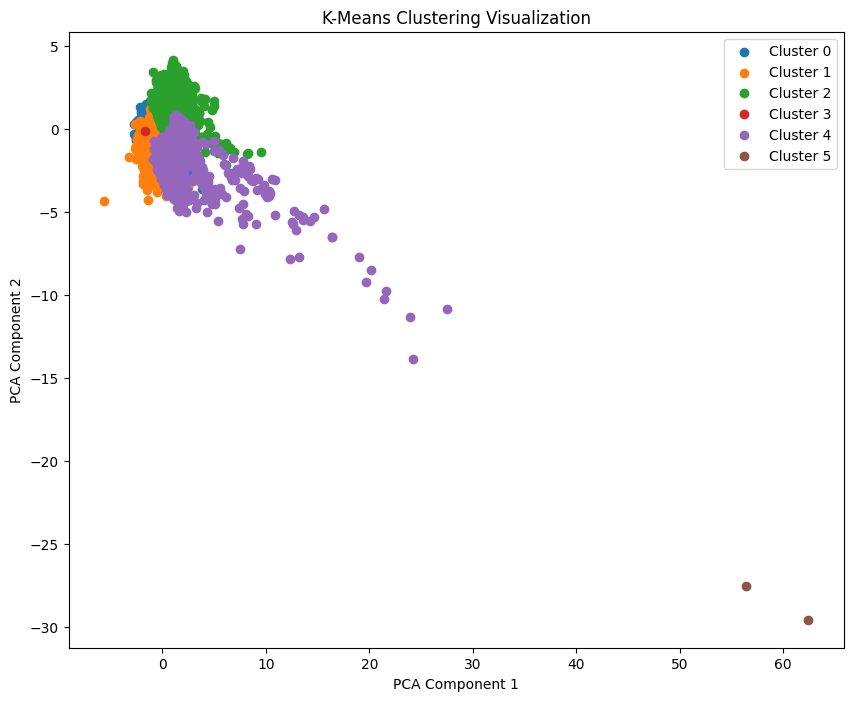

Cluster Analysis:
            MedInc   HouseAge    AveRooms  AveBedrms   Population  \
cluster                                                             
0         3.263824  30.082039    4.848167   1.069373  1298.566000   
1         3.942846  15.348726    5.325567   1.078478  4482.754777   
2         3.329282  29.472328    5.326495   1.089370  1169.132393   
3        10.226400  45.000000    3.166667   0.833333  7460.000000   
4         6.916007  27.862508    7.330033   1.182805  1158.347485   
5         3.250000  33.500000  137.221212  29.851515    33.000000   

            AveOccup   Latitude   Longitude  MedHouseVal       pca1       pca2  
cluster                                                                         
0           3.097334  33.949181 -117.982938     1.753860  -0.933509  -0.468990  
1           4.364604  34.820008 -118.733376     1.933565  -0.739887  -0.867356  
2           2.788794  38.017881 -121.691248     1.689169   0.774959   1.403915  
3        1243.333333  38

In [236]:
# Create a dot plot
plt.figure(figsize=(10, 8))
for cluster in range(6):
    cluster_data = df[df['cluster'] == cluster]
    plt.scatter(cluster_data['pca1'], cluster_data['pca2'], label=f'Cluster {cluster}')
    
plt.title('K-Means Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

# Analyze the clusters
# Print basic statistics for each cluster
cluster_analysis = df.groupby('cluster').mean()
print("Cluster Analysis:")
print(cluster_analysis) 

In [237]:
# Predict the clusters for the test set
X_test['cluster'] = kmeans.predict(scaled_features)   

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices